In [1]:
from src.utils.PathManager import Paths as Path 
from src.utils.Visualisation import plot_ROC
import pandas as pd 
import numpy as np 
import yaml 
import matplotlib.pyplot as plt 

In [2]:
with open(Path.config("nearest_station.yaml"), 'r') as file:
    station_dict = yaml.safe_load(file)

In [22]:
import matplotlib.pyplot as plt 
import pandas as pd 
from datetime import timedelta 

colour_dict = {0:'gold',
               1:'orchid',
               2:'navy',
               3:'salmon',
               4:'red', 
               5:'darkred',
               6:'wheat', 
               7:'yellowgreen',
               8:'mediumvioletred',
               9:'aqua'}

weather_color_dict ={
    "cloudcover":'red',
    "cloudcover_low":'blue',
    "cloudcover_mid":'white',
    "cloudcover_high":'brown',
    "shortwave_radiation":'black',
    "direct_radiation":'purple',
    "diffuse_radiation":'pink',
    "direct_normal_irradiance":'orange'
}

def plot_label(ax: plt.axes, label:pd.Series|pd.DataFrame, start:str=None, end:str=None):
    #Slice dataframe based on start and end 
    if isinstance(label, pd.DataFrame):
        label_df = label.labels
    if start is None and end is None:
        label_df = label
    elif start is None and end is not None:
        label_df = label.loc[:end]
    elif start is not None and end is None:
        label_df = label.loc[start:]
    else:
        label_df = label.loc[start:end]
        
    #Overlaying label columns
    for i in range(len(label_df)):
        x_start = label_df.index[i]
        x_end = x_start + timedelta(days=1)
        colour = colour_dict[label_df[i]]
        ax.axvspan(x_start, x_end, ymin=0, ymax=1, color=colour, alpha = 0.5)
        
def plot_data(ax: plt.Axes, 
              df:pd.Series, 
              start:str=None, 
              end:str=None, 
              color:str='g',
              size:int=20,
              marker:str='.'):
    #Slice dataframe based on start and end 
    if start is None and end is None:
        plot_df = df
    elif start is None and end is not None:
        plot_df = df.loc[:end]
    elif start is not None and end is None:
        plot_df = df.loc[start:]
    else:
        plot_df = df.loc[start:end]
        
    #Plot overlaying features 
    ax.scatter(plot_df.index, plot_df.values, c=color, s=size, marker=marker, label=plot_df.name)
    ax.grid()
    
def plot_ROC(raw_df, well_name, weather_df=None, label_df=None, start=None, end=None, 
                    raw_features:list=["ROC_VOLTAGE","FLOW","PRESSURE_TH"],
                    weather_features:list = ["cloudcover", "cloudcover_low", "cloudcover_mid", "cloudcover_high",
                    "shortwave_radiation", "direct_radiation","diffuse_radiation","direct_normal_irradiance"]):

    fig, ax = plt.subplots(len(raw_features), figsize=(50,35), sharex=True)
    for idx, feature in enumerate(raw_features):
        cloud_axis = ax[idx].twinx()
        radiation_axis = ax[idx].twinx()
        radiation_axis.spines.right.set_position(("axes", 1.03))
        cloud_axis.set_ylabel("Cloud Cover", size=20)
        radiation_axis.set_ylabel("Radiation", size=20)
        cloud_axis.set_ylim(0,100)
        radiation_axis.set_ylim(0,1000)
        ax[idx].yaxis.set_tick_params(labelsize=20)
        cloud_axis.yaxis.set_tick_params(labelsize=20)
        radiation_axis.yaxis.set_tick_params(labelsize=20)

        plot_data(ax[idx], raw_df[feature], start, end)
        if label_df is not None:
            plot_label(ax[idx],label_df, start, end)
        if weather_df is not None:
            for weather_feature in weather_features:
                if "cloud" in weather_feature:
                    plot_data(cloud_axis, weather_df[weather_feature], start, end, color=weather_color_dict[weather_feature],size=30, marker="X")
                if "rad" in weather_feature:
                    plot_data(radiation_axis, weather_df[weather_feature], start, end, color=weather_color_dict[weather_feature],size=30, marker="D")
        ax[idx].set_ylabel(feature, size=20)
        ax[idx].legend(loc='upper left', prop={'size': 15})
        cloud_axis.legend(loc='upper right', prop={'size': 15})
        radiation_axis.legend(loc='lower left', prop={'size': 15})
        
    fig.suptitle(f'{well_name}',fontsize=96)
    plt.xlabel("TS")
    return fig 
    

In [23]:
station_dict

{'ACRUS1': 'Jackson',
 'BIGL22': 'Moomba',
 'MOOM115': 'Moomba',
 'POND1': 'Tirrawarra',
 'POND11': 'Tirrawarra',
 'POND14': 'Tirrawarra',
 'POND16': 'Tirrawarra',
 'PSYC3': 'Jackson',
 'PSYC7': 'Jackson',
 'TIRRA80': 'Tirrawarra',
 'TIRRA88': 'Tirrawarra',
 'TIRRA91': 'Tirrawarra',
 'TIRRA93': 'Tirrawarra',
 'TIRRW1': 'Tirrawarra',
 'TOOL29': 'Epsilon',
 'WELTN1': 'Jackson',
 'WIPPOS1': 'Woomanooka',
 'WKT3': 'Woomanooka',
 'YAN1L': 'Woomanooka',
 'YAN2L': 'Woomanooka',
 'YAN2U': 'Woomanooka',
 'YAN4U': 'Woomanooka',
 'YAN8L': 'Woomanooka'}

In [24]:
well_name = "TIRRA80"
well_df = pd.read_csv(Path.data(f"{well_name}_raw.csv"), index_col="TS", parse_dates=['TS'])
weather_df = pd.read_csv(Path.data(f"{station_dict[well_name]}_weather.csv"), index_col="TS", parse_dates=["TS"])
label_df = pd.read_pickle(Path.data(f"{well_name}_labelled.pkl"))

In [25]:
label_df[label_df.labels==9]

,labels,ROC_VOLTAGE,FLOW,PRESSURE_TH,Mask_ROC_VOLTAGE,Mask_FLOW,Mask_PRESSURE_TH,series_length
2018-06-25,9,"[29.58851051, 29.59929085, 29.59695371, 29.594...","[8.080025195, 7.9091126925, 7.73820019, 7.9797...","[1405.02941895, 1417.55322266, 1423.81591797, ...","[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",10080
2018-06-26,9,"[25.71084023, 25.66978073, 25.73150063, 25.747...","[7.5184598, 7.0384748, 6.5584898, 6.64437008, ...","[1386.76635742, 1399.70776367, 1407.74365234, ...","[1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, ...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",10080


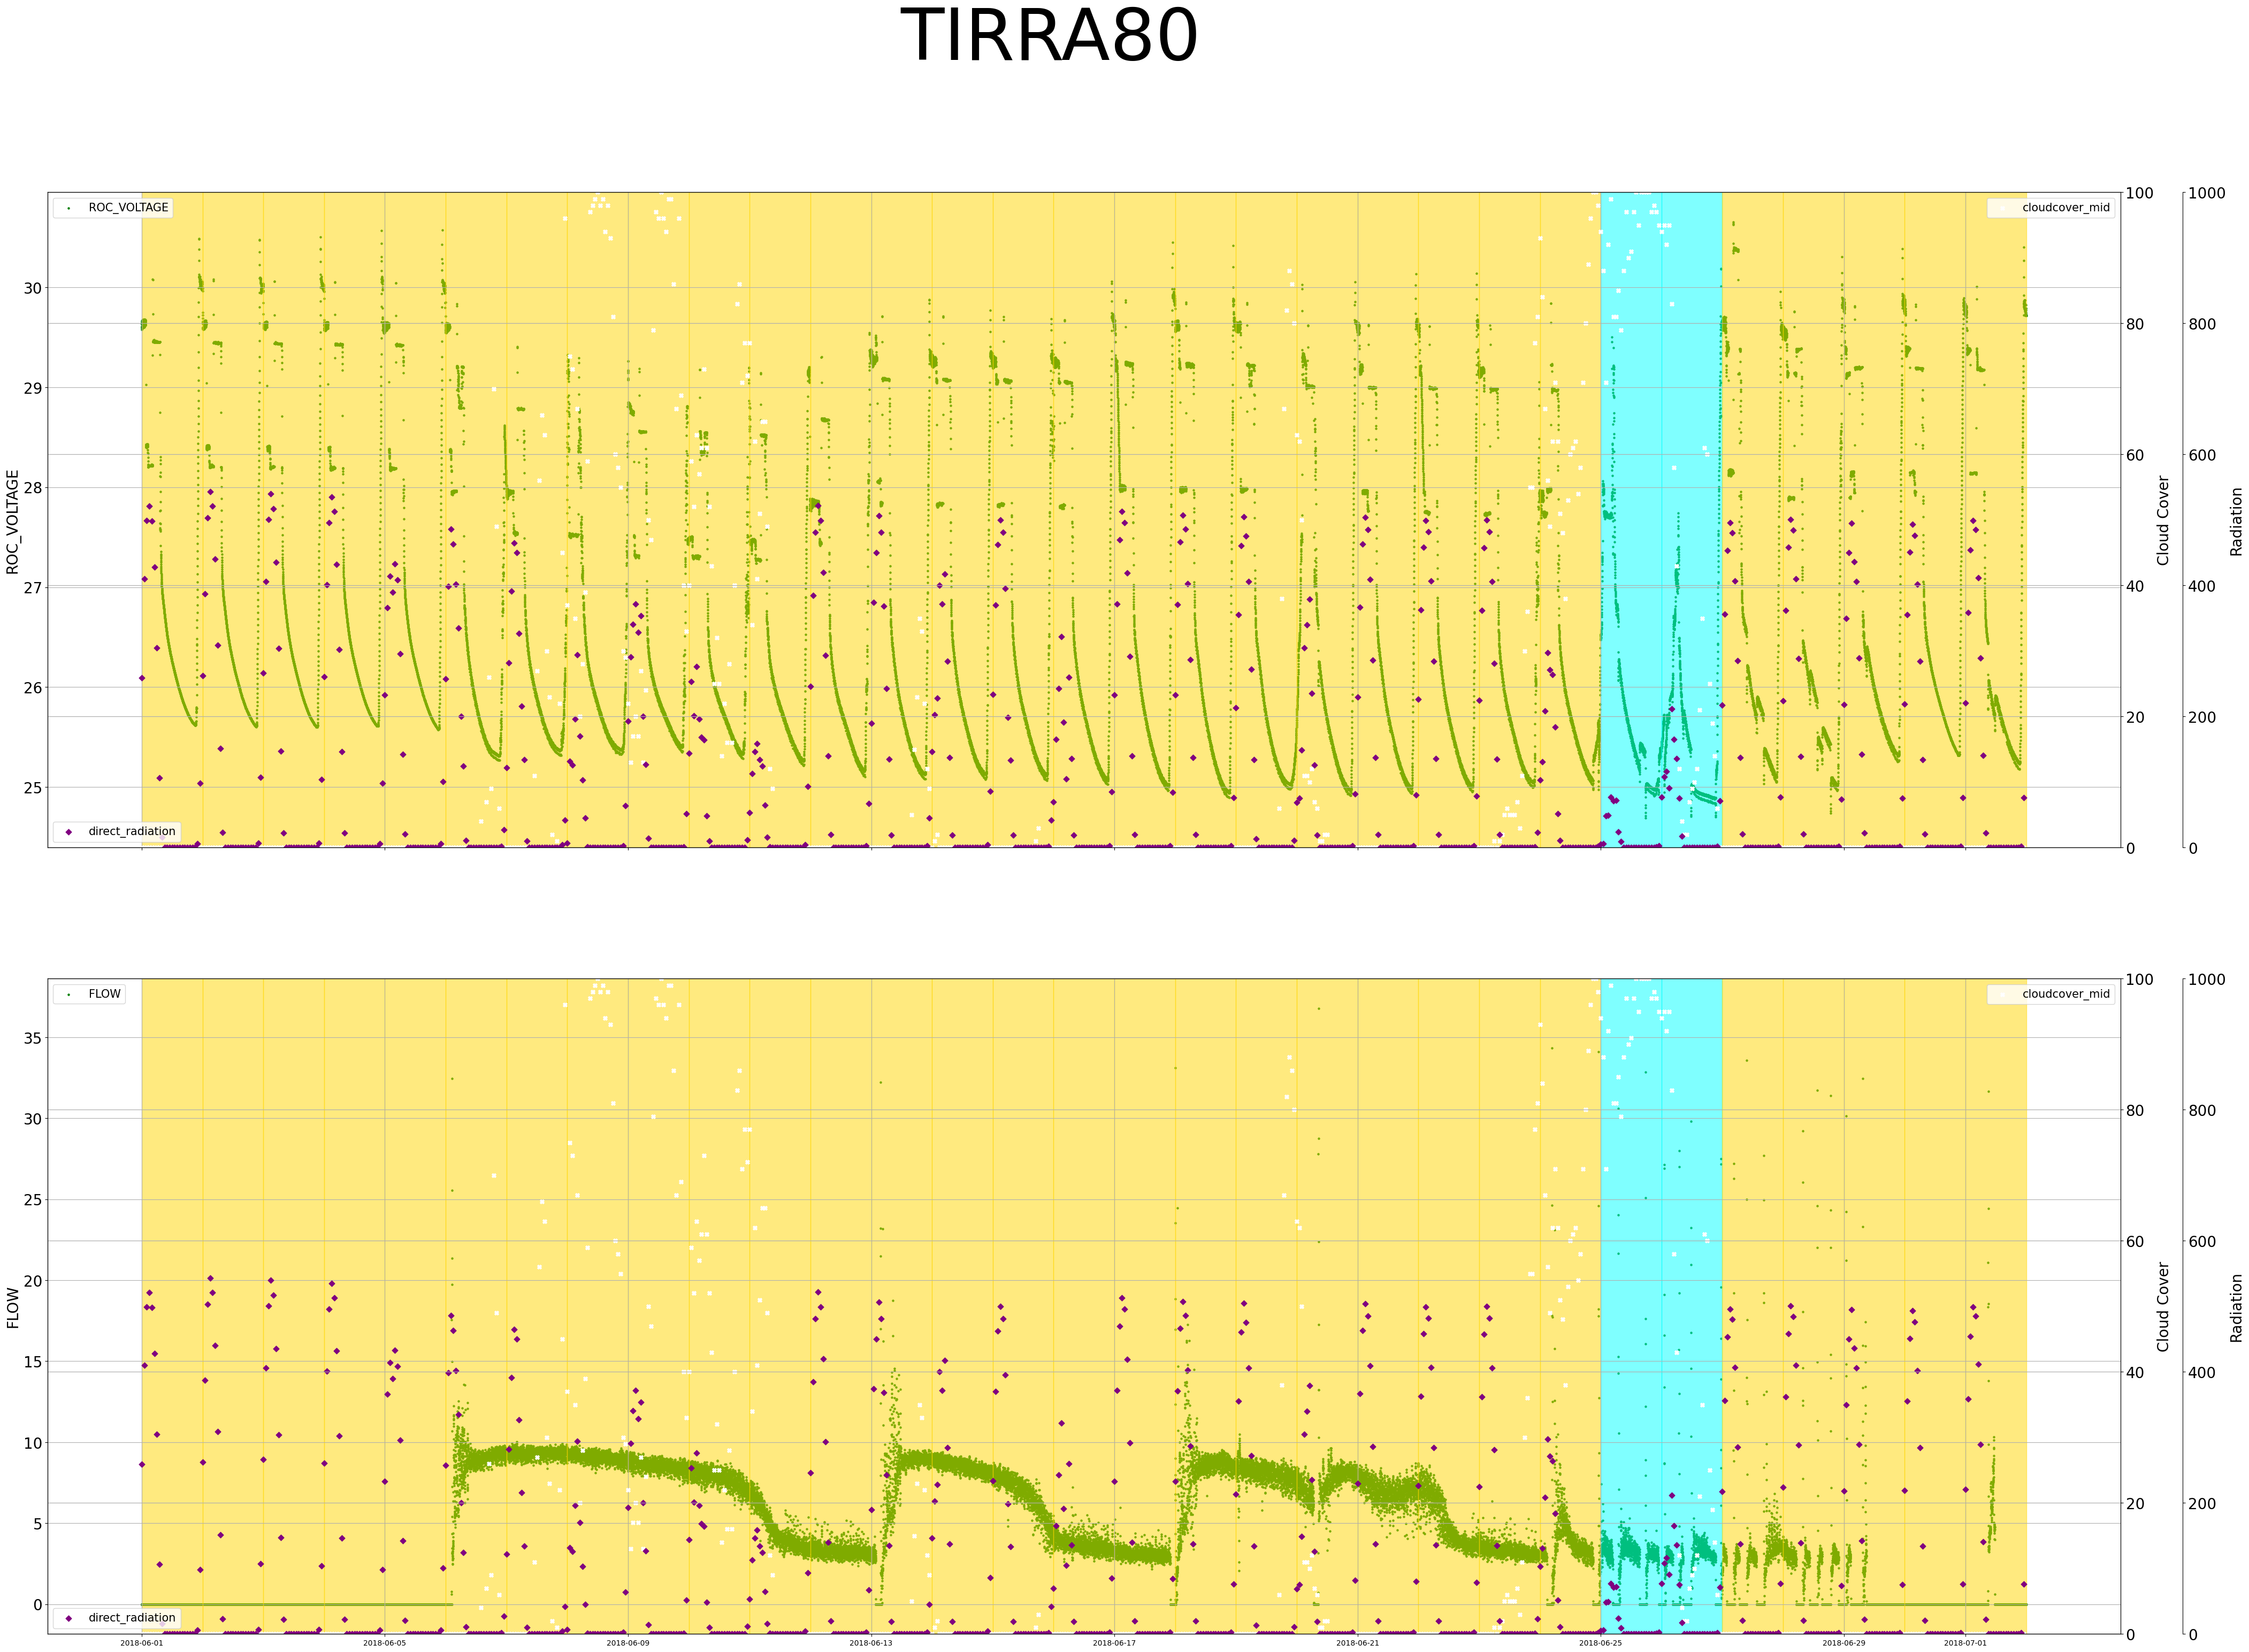

In [26]:
start = "2018-06-01"
end="2018-07-01"
fig = plot_ROC(raw_df=well_df, 
         well_name=well_name, 
         weather_df = weather_df, 
         label_df = label_df.labels,
         start=start, 
         end=end, 
         raw_features=['ROC_VOLTAGE',"FLOW"], 
         weather_features=['cloudcover_mid','direct_radiation'])
fig.savefig(Path.viz(f"{well_name}_{start}_{end}.png"))

In [3]:
df = pd.read_pickle(Path.data("ACRUS1_2016-01-01_2023-01-01_labelled.pkl"))

In [4]:
df

,ROC_VOLTAGE,FLOW,PRESSURE_TH,Mask_ROC_VOLTAGE,Mask_FLOW,Mask_PRESSURE_TH,labels,temperature_2m,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,relativehumidity_2m,rain
2018-01-07,"[12.4648304, 0.0, 12.41131973, 0.0, 12.4342603...","[38.49822998, 38.122509, 38.51737976, 39.02677...","[1259.00439453, 1259.00439453, 1259.10888672, ...","[1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3,"[35.1, 36.7, 37.6, 38.3, 38.1, 37.7, 36.9, 34....","[12.0, 9.0, 8.0, 31.0, 24.0, 63.0, 86.0, 90.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[10.0, 5.0, 4.0, 22.0, 22.0, 81.0, 98.0, 100.0...","[19.0, 19.0, 19.0, 60.0, 35.0, 49.0, 92.0, 100...","[745.0, 920.0, 1026.0, 898.0, 691.0, 479.0, 28...","[612.0, 784.0, 896.0, 506.0, 256.0, 208.0, 60....","[133.0, 136.0, 130.0, 392.0, 435.0, 271.0, 228...","[818.8, 891.6, 929.9, 508.8, 263.9, 233.3, 78....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2018-01-08,"[0.0, 0.0, 0.0, 0.0, 0.0, 12.33141041, 0.0, 12...","[38.33145905, 37.75217819, 37.45138931, 37.999...","[1278.10925293, 1277.79614258, 1277.58728027, ...","[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3,"[34.3, 36.7, 37.1, 37.9, 38.9, 39.0, 39.1, 37....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[783.0, 952.0, 1050.0, 1103.0, 1075.0, 977.0, ...","[671.0, 829.0, 911.0, 972.0, 945.0, 853.0, 704...","[112.0, 123.0, 139.0, 131.0, 130.0, 124.0, 115...","[899.5, 943.9, 946.1, 977.5, 974.0, 956.0, 919...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2018-01-09,"[0.0, 12.33802032, 0.0, 12.33677959, 12.326459...","[39.13734055, 39.05532074, 40.17795944, 40.361...","[1257.02099609, 1252.21911621, 1258.7956543, 1...","[0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, ...","[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3,"[30.3, 32.4, 33.6, 34.5, 35.4, 35.6, 35.6, 35....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[801.0, 971.0, 1080.0, 1120.0, 1089.0, 990.0, ...","[687.0, 846.0, 949.0, 987.0, 958.0, 864.0, 713...","[114.0, 125.0, 131.0, 133.0, 131.0, 126.0, 116...","[922.8, 964.5, 986.1, 992.8, 987.2, 967.7, 930...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2018-01-10,"[0.0, 0.0, 0.0, 0.0, 0.0, 12.38222027, 12.4008...","[38.81890106, 38.56103134, 38.03686905, 38.210...","[1208.89416504, 1208.89416504, 1208.89416504, ...","[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3,"[32.9, 35.1, 36.4, 36.9, 37.7, 38.1, 38.4, 37....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[800.0, 969.0, 1078.0, 1120.0, 1090.0, 990.0, ...","[685.0, 844.0, 948.0, 987.0, 959.0, 864.0, 713...","[115.0, 125.0, 130.0, 133.0, 131.0, 126.0, 116...","[922.0, 963.3, 985.7, 993.0, 988.0, 967.1, 929...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2018-01-11,"[0.0, 0.0, 12.37767029, 0.0, 0.0, 12.37849998,...","[39.09228134, 0.0, 37.75323105, 37.91268921, 3...","[1259.00439453, 1258.90002441, 1255.76